In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')  

In [3]:
fifaB = pd.read_csv('/Users/Bijou/FIFA_MONEYBALL_PROJECT_OCT92021/fifa21_male2.csv')  

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500) 

In [5]:
fifaB.head(5) 


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [6]:
fifaB.columns =list(map(lambda x:x.lower(), fifaB.columns)) 
fifaB.head(20)

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
5,61,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,https://cdn.sofifa.com/players/000/061/12_120.png,https://cdn.sof

In [7]:
fifaB.drop(['player photo', 
            'club logo','flag photo',
            'joined','loan date end',
            'release clause','gender',
            'contract'
            ], axis =1, inplace=True)

In [8]:
print(fifaB['team & contract'].unique())  
print(fifaB['team & contract'].value_counts())   
print(fifaB['team & contract'].dtype)


['Udinese 2008 ~ 2016' 'KAS Eupen 2014 ~ 2019' 'Coventry City 2016 ~ 2020'
 ... 'SK Brann 2020 ~ 2024' 'FC St. Gallen 2020 ~ 2021'
 'Burnley 2020 ~ 2021']
India Free                    36
Bulgaria Free                 27
Egypt Free                    23
Uruguay Free                  22
Ecuador Free                  21
                              ..
Pogoń Szczecin 2011 ~ 2021     1
Cardiff City 2012 ~ 2014       1
USL Dunkerque 2020 ~ 2025      1
Ross County FC 2016 ~ 2023     1
LDU Quito 2016 ~ 2022          1
Name: team & contract, Length: 9822, dtype: int64
object


In [9]:
fifaB.sort_values(by='team & contract')

,id,name,age,ova,nationality,club,bov,bp,position,pot,team & contract,height,weight,foot,growth,value,wage,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
5526,211703,M. Schnatterer,34,71,Germany,1. FC Heidenheim 1846,71,RM,RM LM CAM,71,1. FC Heidenheim 1846 2008 ~ 2021,"5'11""",165lbs,Right,0,€1.2M,€16K,314,77,73,29,71,64.0,373,69,80.0,82,71,71,350,67,68,77.0,68,70.0,346,76,62.0,69,62,77,319,47,47.0,69.0,71.0,85,74.0,97,30,35,32.0,36,9,7,7,6,7,1835,381,4 ★,3★,High,Medium,1 ★,68,74,73,70,35,61,7,66+2,66+2,66+2,71+0,70+0,70+0,70+0,71+0,71+0,71+0,71+0,70+1,68+2,68+2,68+2,70+1,58+2,56+2,56+2,56+2,58+2,53+2,45+2,45+2,45+2,53+2,14+2
1854,183573,N. Theuerkauf,33,72,Germany,1. FC Heidenheim 1846,72,LB,LB CDM,72,1. FC Heidenheim 1846 2015 ~ 2021,"6'0""",176lbs,Left,0,€1.4M,€16K,291,67,46,64,70,44.0,303,59,57.0,55,66,66,326,60,60,68.0,72,66.0,359,74,70.0,76,76,63,325,73,73.0,56.0,59.0,64,65.0,220,75,74,71.0,50,14,7,11,6,12,1874,392,3 ★,2★,Low,High,1 ★,60,56,65,63,73,75,6,61+2,61+2,61+2,62+0,62+0,62+0,62+0,62+0,62+2,62+2,62+2,63+2,66+2,66+2,66+2,63+2,70+2,71+1,71+1,71+1,70+2,70+2,72+0,72+0,72+0,70+2,17+2
4090,202873,K. Müller,29,73,Germany,1. FC Heidenheim 1846,73,GK,GK,73,1. FC Heidenheim 1846 2015 ~ 2025,"6'3""",198lbs,Right,0,€2.8M,€16K,70,12,13,13,21,11.0,84,17,13.0,16,20,18,255,49,46,48.0,69,43.0,239,50,67.0,31,76,15,102,41,20.0,11.0,10.0,20,52.0,32,12,10,10.0,355,72,70,66,72,75,1137,402,3 ★,1★,Medium,Medium,1 ★,72,70,66,75,47,72,6,28+2,28+2,28+2,24+0,25+0,25+0,25+0,24+0,23+2,23+2,23+2,24+2,22+2,22+2,22+2,24+2,24+2,25+2,25+2,25+2,24+2,24+2,27+2,27+2,27+2,24+2,72+1
5575,211952,M. Thiel,27,66,Germany,1. FC Heidenheim 1846,67,LW,LM RM,66,1. FC Heidenheim 1846 2017 ~ 2021,"6'2""",179lbs,Left,0,€675K,€7K,299,65,62,48,64,60.0,329,72,67.0,65,56,69,335,69,75,68.0,63,60.0,327,77,55.0,53,74,68,243,43,33.0,63.0,58.0,46,56.0,81,24,32,25.0,56,14,16,7,10,9,1670,362,3 ★,3★,Medium,Medium,1 ★,72,65,62,70,31,62,4,65+1,65+1,65+1,67+-1,66+0,66+0,66+0,67+-1,65+1,65+1,65+1,65+1,60+2,60+2,60+2,65+1,51+2,48+2,48+2,48+2,51+2,48+2,43+2,43+2,43+2,48+2,18+2
7765,224980,M. Busch,25,71,Germany,1. FC Heidenheim 1846,71,RB,RB,75,1. FC Heidenheim 1846 2017 ~ 2023,"6'0""",176lbs,Right,4,€2.7M,€14K,261,72,37,53,65,34.0,268,68,42.0,37,54,67,378,85,86,69.0,68,70.0,314,70,56.0,69,74,45,277,78,65.0,53.0,45.0,36,55.0,198,67,68,63.0,52,9,6,14,16,7,1748,396,3 ★,3★,High,Medium,1 ★,86,46,58,68,65,73,5,59+2,59+2,59+2,64+0,61+0,61+0,61+0,64+0,60+2,60+2,60+2,65+2,60+2,60+2,60+2,65+2,69+2,65+2,65+2,65+2,69+2,69+2,67+2,67+2,67+2,69+2,16+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,201114,B. Pawłowski,27,70,Poland,Śląsk Wrocław,70,RM,RM ST LM,70,Śląsk Wrocław 2020 ~ 2023,"5'10""",154lbs,Right,0,€1.9M,€6K,306,63,66,56,66,55.0,327,71,66.0,61,59,70,395,88,87,80.0,63,77.0,340,68,73.0,73,64,62,258,43,29.0,67.0,61.0,58,66.0,66,34,17,15.0,65,14,13,13,14,11,1757,378,3 ★,3★,High,Medium,1 ★,87,65,63,72,28,63,12,67+2,67+2,67+2,70+0,69+0,69+0,69+0,70+0,68+2,68+2,68+2,69+1,61+2,61+2,61+2,69+1,53+2,48+2,48+2,48+2,53+2,49+2,41+2,41+2,41+2,49+2,19+2
6598,218633,F. Piasecki,25,64,Poland,Śląsk Wrocław,

In [11]:
#try using split 
    # - step 1 convert to a dataframe 
team= pd.DataFrame((fifaB['team & contract']))
team =team.rename(columns={'team & contract':'TC'}) 
print(team) 


team.TC.str.split(expand=True)

    # - step 2 apply the split function to the new dataframe 

#team_name = team..str.split(expand = True,)

# date = team.str.split()[-1]

#fifaB['team & contract'] = fifaB['team & contract'].split()[0]


#x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
#x=x.rename(columns={'index':'nationality','nationality':'count'}) 


                                    TC
0                  Udinese 2008 ~ 2016
1                KAS Eupen 2014 ~ 2019
2            Coventry City 2016 ~ 2020
3                      Sunderland 2009
4              Vissel Kobe 2018 ~ 2021
...                                ...
17120  CD Tondela Jun 30, 2021 On Loan
17121              Burnley 2020 ~ 2021
17122              Burnley 2020 ~ 2022
17123        SK Sturm Graz 2020 ~ 2023
17124                Lecce 2020 ~ 2024

[17125 rows x 1 columns]


,0,1,2,3,4,5,6,7,8,9
0,Udinese,2008,~,2016,None,None,None,None,None,None
1,KAS,Eupen,2014,~,2019,None,None,None,None,None
2,Coventry,City,2016,~,2020,None,None,None,None,None
3,Sunderland,2009,None,None,None,None,None,None,None,None
4,Vissel,Kobe,2018,~,2021,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
17120,CD,Tondela,Jun,"30,",2021,On,Loan,None,None,None
17121,Burnley,2020,~,2021,None,None,None,None,None,None
17122,Burnley,2020,~,2022,None,None,None,None,None,None
17123,SK,Sturm,Graz,2020,~,2023,None,None,None,None


In [15]:
team[['1','2','3','4','5','6','7','8','9']]= team.TC.str.split(" ",expand=True)

ValueError: Columns must be same length as key

In [75]:
print(fifaB['club'].unique())  
print(fifaB['club'].value_counts())

['Udinese' 'KAS Eupen' 'Coventry City' 'Sunderland' 'Vissel Kobe'
 'Alemannia Aachen' 'Fenerbahçe SK' 'Manchester United' 'Everton' nan
 'LA Galaxy' 'Newcastle United' 'FC Bayern München' 'Milton Keynes Dons'
 'Hull City' 'Pohang Steelers' 'Leicester City' 'VfB Stuttgart' 'Hungary'
 'FC Anzhi Makhachkala' 'Inter' 'Sydney FC' 'Montreal Impact' 'Milan'
 'Juventus' 'Parma' 'CF Estrela da Amadora' 'Roma' 'Botafogo'
 'Manchester City' 'FC Barcelona' 'Paris Saint-Germain' 'Ipswich Town'
 'Ajax' 'Borussia Dortmund' 'Bolton Wanderers' 'SL Benfica' 'Stoke City'
 'Newport County' 'Burton Albion' 'Aston Villa' 'Rio Ave FC'
 'New York Red Bulls' 'SD Ponferradina' 'Reading' 'Portugal'
 'Bayer 04 Leverkusen' 'Internacional' 'RCD Espanyol' 'Cracovia' 'FC Sion'
 'Lecce' 'Stade Brestois 29' 'Doncaster Rovers' 'Liverpool'
 'New York City FC' 'FC Porto' 'Barnet' 'Finland' 'LOSC Lille' 'Molde FK'
 'West Bromwich Albion' 'Spezia' "Newell's Old Boys" 'Celtic' 'Genoa'
 'Queens Park Rangers' 'Sampdoria' 'Club

In [45]:
#histogram  
#club = pd.DataFrame(fifaB['club'].unique()) 
club = pd.DataFrame(fifaB['club'].value_counts().reset_index()) 
club = club.rename(columns = {'index':'name','club':'total'})
club



,name,total
0,Bolton Wanderers,45
1,Manchester United,45
2,Chelsea,45
3,Aston Villa,43
4,Everton,43
...,...,...
912,SC Fortuna Köln,1
913,Padova,1
914,Osmanlıspor,1
915,Hércules CF,1


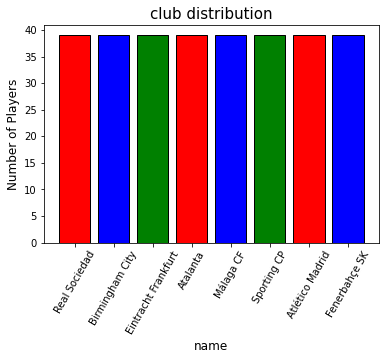

<Figure size 1584x1584 with 0 Axes>

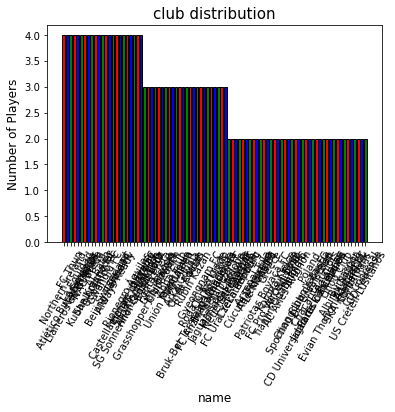

<Figure size 1584x1584 with 0 Axes>

In [57]:
#make a graph of names if possible  


club = pd.DataFrame(fifaB['club'].value_counts().reset_index()) 
club = club.rename(columns = {'index':'name','club':'total'}) 
club = club[(club['total']>38)&(club['total']<40)] 


#x=x[(x['count']<9)&(x['count']>1)]


plt.bar(club['name'],club['total'],color=['red','blue','green'],ec='black')
plt.title('club distribution',fontsize='15')
plt.xlabel('name',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=60) 
plt.figure(figsize=(22,22))
plt.show()   

club = pd.DataFrame(fifaB['club'].value_counts().reset_index()) 
club = club.rename(columns = {'index':'name','club':'total'}) 
club = club[(club['total']>1)&(club['total']<5)] 

plt.bar(club['name'],club['total'],color=['red','blue','green'],ec='black')
plt.title('club distribution',fontsize='15')
plt.xlabel('name',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=60) 
plt.figure(figsize=(22,22))
plt.show()  

In [36]:
plt.hist(club[club['name']]) 


KeyError: 'name'

In [76]:
fifaB.head(2)

,id,name,age,ova,nationality,club,bov,bp,position,pot,team & contract,height,weight,foot,growth,value,wage,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,€625K,€7K,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,€600K,€7K,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1


In [43]:
print(fifaB['name'].value_counts()) 
print(fifaB['name'].unique())  

rows=fifaB.shape[0]
columns=fifaB.shape[1]
print('Rows:',rows)
print('Columns:',columns)

J. Rodríguez            10
A. Traoré                8
J. Rojas                 8
J. Jones                 7
Paulinho                 7
                        ..
B. Oviedo                1
M. Aguirregaray          1
E. Ntim                  1
B. O'Brien-Whitmarsh     1
E. Orzuza                1
Name: name, Length: 16176, dtype: int64
['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
Rows: 17125
Columns: 99


In [ ]:
#make a list of the column names and loop on them instead of writing them all out 
#use an index function to find the position of the element in the list 


fifaB['w/f']= fifaB['w/f'].astype(str).str[:1].astype(np.int64)  
fifaB['sm']= fifaB['sm'].astype(str).str[:1].astype(np.int64)  
fifaB['ir']= fifaB['ir'].astype(str).str[:1].astype(np.int64)   
# --------------------------------------------------------------------------------
fifaB['ls']= fifaB['ls'].astype(str).str[:2].astype(np.int64)  
fifaB['st']= fifaB['st'].astype(str).str[:2].astype(np.int64)  
fifaB['rs']= fifaB['rs'].astype(str).str[:2].astype(np.int64) 
fifaB['lw']= fifaB['lw'].astype(str).str[:2].astype(np.int64) 
fifaB['lf']= fifaB['lf'].astype(str).str[:2].astype(np.int64)  
fifaB['cf']= fifaB['cf'].astype(str).str[:2].astype(np.int64) 
fifaB['rf']= fifaB['rf'].astype(str).str[:2].astype(np.int64)  
fifaB['rw']= fifaB['rw'].astype(str).str[:2].astype(np.int64)   

fifaB['lam']= fifaB['lam'].astype(str).str[:2].astype(np.int64)   
fifaB['cam']= fifaB['cam'].astype(str).str[:2].astype(np.int64)    
fifaB['ram']= fifaB['ram'].astype(str).str[:2].astype(np.int64)   
fifaB['lm']= fifaB['lm'].astype(str).str[:2].astype(np.int64)  
fifaB['lcm']= fifaB['lcm'].astype(str).str[:2].astype(np.int64)    
fifaB['cm']= fifaB['cm'].astype(str).str[:2].astype(np.int64)   
fifaB['rcm']= fifaB['rcm'].astype(str).str[:2].astype(np.int64)    
fifaB['rm']= fifaB['rm'].astype(str).str[:2].astype(np.int64)    
fifaB['lwb']= fifaB['lwb'].astype(str).str[:2].astype(np.int64)   
fifaB['ldm']= fifaB['rw'].astype(str).str[:2].astype(np.int64)   
fifaB['cdm']= fifaB['cdm'].astype(str).str[:2].astype(np.int64)   
fifaB['rdm']= fifaB['rdm'].astype(str).str[:2].astype(np.int64)   
fifaB['rwb']= fifaB['rwb'].astype(str).str[:2].astype(np.int64)  
fifaB['lb']= fifaB['lb'].astype(str).str[:2].astype(np.int64) 
fifaB['lcb']= fifaB['lcb'].astype(str).str[:2].astype(np.int64)  
fifaB['cb']= fifaB['cb'].astype(str).str[:2].astype(np.int64)  
fifaB['rcb']= fifaB['rcb'].astype(str).str[:2].astype(np.int64)    
fifaB['rb']= fifaB['rb'].astype(str).str[:2].astype(np.int64)  


#one data value has a K in hits ??? error  
#be best to replace this one data point as a null?
#fifaB['hits']=fifaB['hits'].astype(str).str.strip('K').astype(np.int64)


- if you want to know what all the abbreviations mean #https://www.console-deals.com/blog/fifa-terminology-glossary-5504/
  - sm = skill moves (ability to pull of skill moves)
  - pac = pace (the speed of the player)
      -compare speed weights and height of players 
  - sho = shooting (the players shooting ability )
  - pas = passing (passing ability)
  - dri = dribbling 
  - def = defending (players all round defensive abilites, including tackling, heading and positioning)
  - phy = physical (players overall physical attributes including strength)
  - st = striker 
  - lw = left winger 
  - lf= ?could mean left fielder?
  - cf = center forward 
  - rf = ?right forward?
  - rw = right winger (more attacking option than a right midfielder )
  - cam = central attacking midfielder 
  - lm = left midfielder 
  - cm = center midfielder 
  - rm = right midfielder 
  - cdm = central defensive midfielder 
  - lb = left back 
  - cb = center back 
  - rb = right back 
  - gk = goal keeper  
      make a table specifically for the goal keeper stats 

In [ ]:
fifaB= fifaB.rename(columns = {  
    'sm':'skill moves',
    'cm':'central midfielder',  
    'pac':'pace',
    'sho':'shooting', 
    'pas':'passing', 
    'dri':'dribbling',
    'def':'defending',
    'phy':'physical',
    'st':'striker',
    'lw':'left winger',
    'cf':'center forward',
    'rw':'right winger',
    'cam':'central attacking midfielder',
    'lm':'left midfielder',
    'cm':'center midfielder', 
    'rm':'right midfielder',
    'cdm':'central defensive midfielder',
    'lb':'left back',
    'cb':'center back',
    'rb':'right back', 
    'gk':'goal keeper', 
    'sliding tackle':'sliding_tackle'
    
})

In [ ]:
#to type press alt option shift 2 = € 
fifaB['value']=fifaB['value'].str.strip('€')
fifaB['wage']=fifaB['wage'].str.strip('€') 

  
fifaB['weight']=fifaB['weight'].str.strip('lbs').astype(np.int64)   
#can also use replace
#try cm 

#fifaB['cb']= fifaB['cb'].astype(str).str[:2].astype(np.int64)  

In [ ]:
fifaB.head()

In [ ]:
fifaB.dtypes

In [ ]:
#remove null values 

In [54]:
nulls = pd.DataFrame(fifaB.isna().sum()) 
nulls = nulls.reset_index()
nulls.columns=['header_name','count']
nulls

,header_name,count
0,id,0
1,name,0
2,age,0
3,ova,0
4,nationality,0
5,club,23
6,bov,0
7,bp,0
8,position,413
9,pot,0


In [55]:
to_check=nulls[nulls['count']>0] 
to_check 
#delete the null values for interceptions and positioning  
#replace with the mean for everything else 


,header_name,count
5,club,23
8,position,413
22,volleys,58
25,curve,58
32,agility,58
34,balance,58
37,jumping,58
43,interceptions,7
44,positioning,7
45,vision,58


In [ ]:
list(to_check['header_name'].values)

In [ ]:
mean_fifaB_jumping =fifaB['jumping']= np.mean(fifaB['jumping']) 
fifaB['jumping']=fifaB['jumping'].fillna(mean_fifaB_jumping) 

mean_fifaB_volleys =fifaB['volleys']= np.mean(fifaB['volleys']) 
fifaB['volleys']=fifaB['volleys'].fillna(mean_fifaB_volleys)  

mean_fifaB_curve =fifaB['curve']= np.mean(fifaB['curve']) 
fifaB['curve']=fifaB['curve'].fillna(mean_fifaB_curve)  

mean_fifaB_agility =fifaB['agility']= np.mean(fifaB['agility']) 
fifaB['agility']=fifaB['agility'].fillna(mean_fifaB_agility) 

mean_fifaB_balance =fifaB['balance']= np.mean(fifaB['balance']) 
fifaB['balance']=fifaB['balance'].fillna(mean_fifaB_balance) 

mean_fifaB_interceptions =fifaB['interceptions']= np.mean(fifaB['interceptions']) 
fifaB['interceptions']=fifaB['interceptions'].fillna(mean_fifaB_interceptions) 

mean_fifaB_positioning =fifaB['positioning']= np.mean(fifaB['positioning']) 
fifaB['positioning']=fifaB['positioning'].fillna(mean_fifaB_positioning)  

mean_fifaB_vision =fifaB['vision']= np.mean(fifaB['vision']) 
fifaB['vision']=fifaB['vision'].fillna(mean_fifaB_vision) 

mean_fifaB_composure =fifaB['composure']= np.mean(fifaB['composure']) 
fifaB['composure']=fifaB['composure'].fillna(mean_fifaB_composure) 

mean_fifaB_sliding_tackle =fifaB['sliding_tackle']= np.mean(fifaB['sliding_tackle']) 
fifaB['sliding_tackle']=fifaB['sliding_tackle'].fillna(mean_fifaB_sliding_tackle)  

#error 
#mean_fifaB_d/w =fifaB['d/w']= np.mean(fifaB['d/w']) 
#fifaB['d/w']=fifaB['d/w'].fillna(mean_fifaB_d/w) 

#error 
#mean_fifaB_a/w =fifaB['a/w']= np.mean(fifaB['a/w']) 
#fifaB['a/w']=fifaB['a/w'].fillna(mean_fifaB_a/w) 

In [ ]:
clean = pd.DataFrame(fifaB.isna().sum()) 
clean= clean.reset_index()
clean.columns=['header_name','count']
clean

In [ ]:
print('before:',fifaB.shape)
name = fifaB.copy()
name = name.drop_duplicates(subset=['name']) 
print('after name duplicate removal',name.shape) 
name.head(2)

- age distribution 
- nationality distribution 

In [37]:
import matplotlib.pyplot as plt

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[x['count']>1000]

plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  
 
#---------------------------------    
BBBB='England','Germany','Spain'
values = [1707,1154,1121] 
plt.pie(values,
        labels=BBBB,
        autopct='%0.2f',
        radius=1.4
       )
plt.show() 
    

NameError: name 'name' is not defined

In [ ]:
import matplotlib.pyplot as plt

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[x['count']>300]
plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players >300',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  





In [ ]:

%matplotlib inline

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[(x['count']<265)&(x['count']>150)]

plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()

In [ ]:
#how to create a range 

%matplotlib inline

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[(x['count']<30)&(x['count']>10)]

plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players 10-30',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  

In [ ]:

%matplotlib inline

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[(x['count']<9)&(x['count']>1)]



plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players 9-1',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  

In [ ]:
name.sort_values(by='age') 
#oldest = 53 years
#youngest = 16 years

In [ ]:
age_sort=name.sort_values(by='age')  
age_sort

In [ ]:
ova_sort=fifaB.sort_values(by='ova') 
ova_sort.tail(10)

In [ ]:
x= pd.DataFrame((name['age'].value_counts()).reset_index())
x=x.rename(columns={'index':'age','age':'count'}) 
x

plt.bar(x['age'],x['count'],color=['blue'],ec='black')
plt.title('age distribution',fontsize='15')
plt.xlabel('age',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  



In [ ]:
x=pd.DataFrame((name['weight'].value_counts()).reset_index())
x=x.rename(columns={'index':'weight','weight':'count'}) 
x


 

In [ ]:
x=pd.DataFrame((name['weight'].value_counts()).reset_index())
x=x.rename(columns={'index':'weight','weight':'count'}) 
x
x=x[(x['count']<9)&(x['count']>1)]
plt.bar(x['weight'],x['count'],color=['red','blue','green'],ec='black')
plt.title('weight Distribution of Players',fontsize='15')
plt.xlabel('weight',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
BBBB='154 lbs','165 lbs','176 lbs'
values = [1262,1233,970] 
plt.pie(values,
        labels=BBBB,
        autopct='%0.2f',
        radius=1.4,
        startangle=270
       ) 
ax.axis('equal')
ax.set_title('Top 3 : Weight')
plt.show()    



#biggest = 243lbs
#smaller = 110lbs 
